In [2]:
from python_speech_features import ssc

In [4]:
import os
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import pickle
from tqdm import tqdm


file_folder = 'DC_train'

def read(file):
    (rate,sig) = wav.read(file)
    mfcc_feat = logfbank(sig,rate)
    return(mfcc_feat)

labels = ['a','d','su','sa','n','h']

def get_category(f):
    if f[0] == 's' and f[0:2] != 'su' and f[0:2] != 'sa':
        return(0)
        
    elif f[0]== 'a':
        return(1)
        
    elif f[0] == 'd':
        return(2)
        
    elif f[0] == 'n':
        return(3)
        
    elif f[0] == 'h':
        return(4)
    
    elif f[0] == 'f':
        return(7)
        
    elif f[0:2] == 'su':
        return(5)
        
    elif f[0:2] == 'sa':
        return(6)

files = os.listdir(file_folder)

data = []

for i in tqdm(files):
    
    path = file_folder+'/'+i
    #print(i,path)
    d = read(path)
    l = get_category(i)
    for j in d:
        data.append([j,l])
    #break

def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

save_obj(data,file_folder)


 64%|████████████████████████████████████████████████████                              | 54/85 [00:01<00:01, 26.95it/s]WARNING:root:frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.


100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [00:03<00:00, 26.69it/s]


In [6]:
import os
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import pickle
from tqdm import tqdm


file_folder = 'DC_test'

def read(file):
    (rate,sig) = wav.read(file)
    mfcc_feat = logfbank(sig,rate)
    return(mfcc_feat)

labels = ['a','d','su','sa','n','h']

def get_category(f):
    if f[0] == 's' and f[0:2] != 'su' and f[0:2] != 'sa':
        return(0)
        
    elif f[0]== 'a':
        return(1)
        
    elif f[0] == 'd':
        return(2)
        
    elif f[0] == 'n':
        return(3)
        
    elif f[0] == 'h':
        return(4)
    
    elif f[0] == 'f':
        return(7)
        
    elif f[0:2] == 'su':
        return(5)
        
    elif f[0:2] == 'sa':
        return(6)

files = os.listdir(file_folder)

data = []

for i in tqdm(files):
    
    path = file_folder+'/'+i
    #print(i,path)
    d = read(path)
    l = get_category(i)
    for j in d:
        data.append([j,l])
    #break

def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

save_obj(data,file_folder)


100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:01<00:00, 17.80it/s]


In [7]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
#import seaborn as sns


#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
#sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

import pickle
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

data = load_obj('DC_train')
from random import shuffle
shuffle(data)

X = []
y = []

for mfcc,label in data:
    X.append(mfcc)
    y.append(label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
model = ensemble.RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=accuracy_score(y_test, y_pred)
print("training_score",score)

training_score 0.5628776012530767


In [9]:
data = load_obj('DC_test')
X = []
y = []

for ssc,label in data:
    X.append(ssc)
    y.append(label)
y_pred=model.predict(X)
score=accuracy_score(y, y_pred)
print(score)

0.3094278322603935


Confusion matrix, without normalization
[[ 590  193  628  218  118  206  139]
 [ 137  534 1279   58   77  320   56]
 [  64  100 1840   13   27  125   26]
 [ 373  177  596  547  266  267  335]
 [ 176   97  717  281  507  201  372]
 [ 119  394 1207   84   92  813  132]
 [ 328  112  540  381  185  262  312]]
Normalized confusion matrix
[[0.28202677 0.09225621 0.3001912  0.1042065  0.05640535 0.09847036
  0.06644359]
 [0.05566843 0.21698497 0.51970744 0.02356766 0.03128809 0.13002844
  0.02275498]
 [0.02915718 0.04555809 0.83826879 0.00592255 0.01230068 0.05694761
  0.0118451 ]
 [0.14564623 0.06911363 0.23272159 0.21358844 0.10386568 0.10425615
  0.13080828]
 [0.07486176 0.04125904 0.30497661 0.11952361 0.21565291 0.08549553
  0.15823054]
 [0.04188666 0.13868356 0.4248504  0.02956705 0.03238296 0.28616684
  0.04646251]
 [0.15471698 0.05283019 0.25471698 0.17971698 0.08726415 0.12358491
  0.14716981]]


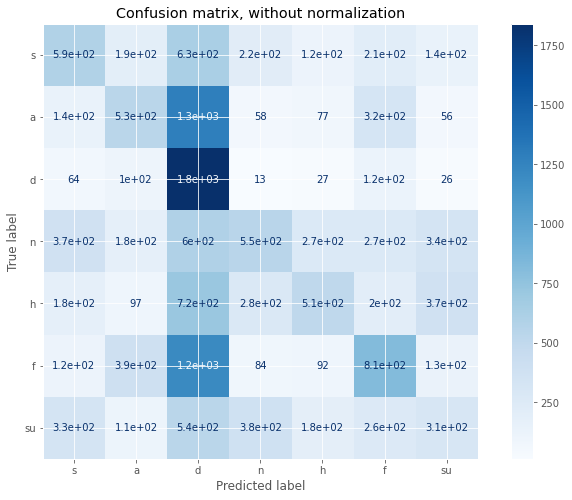

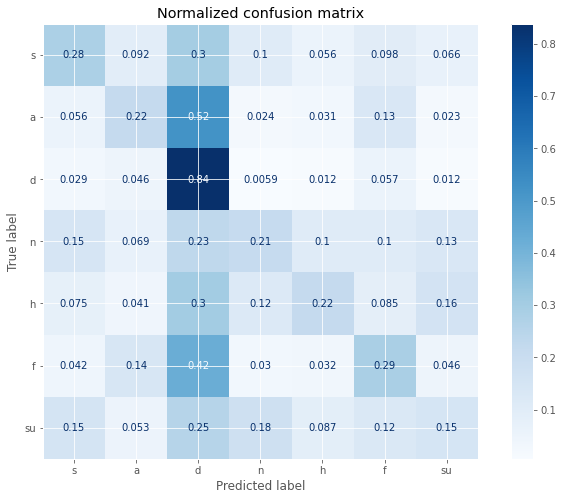

In [10]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

from sklearn.metrics import plot_confusion_matrix
class_names = ['s','a','d','n','h','f','su','sa']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X, y,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()